# **Lecture 4**

In this lecture we will generate data from a Gaussian MA(1) and use the simulated data to calculate the population covariance function.

The MA(1) model is specified as follows:  
  
  $X_t =\epsilon_t + \theta \epsilon_{t-1}$, where $\epsilon_t \sim N(0,\sigma^2)$ i.i.d

### Simulation in Python

**1. Define a time number of time periods, theta and sigma**

In [1]:
T     = 1000  
theta = 5
sigma = 1

**2. For each time period t, we draw a large number of realizations of $\epsilon_t$:**   
(i)  Define the sample size I  
  (ii) import the NumPy module to draw a series of random numbers from the normal distribution."random" is a subpackage of NumPy.  
  * for a general normal distribution, use the attribute ".normal(mu,sigma,[]) "   
  * for a standard normal distribution, use the attribute ".randn[]"

In [2]:
import numpy as np

I = 10000

e = np.random.normal(0, sigma, [T,I]) #array of dimension T x I

**3. Generate $X_t$** 
  * In python, the first element in a vector is indexed 0; in matlab, its 1. 
  
  * -1 denotes the next to last element in a certain column or row.
  
  * In python, by default, a matrix is of the type **array**. You can check the type of $X_t$ by calling "type()". This matters in matrix arithmetics under NumPy:  
  
  For two objecst of the array type, "$\ast$" operator is defined as an element by element multiplication.  
  For two objects of the matrix type, "$\ast$" operator is defined the same as the matrix multiplication in linear algebra.  
    * We can call "np.matrix()" and "np.array()" to convert to each of these types of objects.
    * In matlab, datatype does not quite matter in matrix multiplication. We simply use ".$\ast$" for an element by element multiplication and "$\ast$" for the latter.

In [3]:
e[1,0:2]

array([ 1.08855527, -2.08055287])

In [4]:
e[1,0]

1.0885552689379332

In [5]:
Xt = e[1:,:] + theta*e[0:-1,:]

In [6]:
type(Xt)

numpy.ndarray

**4. Plot one realization**

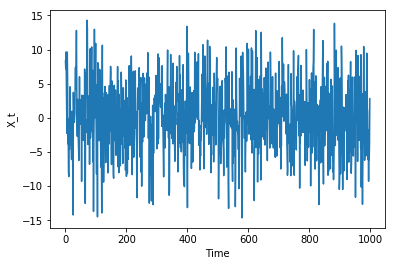

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(Xt[:,0])
plt.xlabel("Time")
plt.ylabel("X_t")
plt.show()

In [8]:
import pandas as pd

aux_data = pd.DataFrame(data=Xt[:,0])

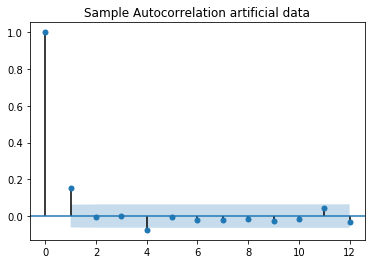

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

acfex=plot_acf(aux_data[0],lags=12, alpha=.05, title='Sample Autocorrelation artificial data')

**5. Calculate the autocovariance for each function**  
* Call np.zeros(n) to generate an n-dimension vector (or n by m matrix by np.zeros(n,m)). In Python, by default, this is a row, whereas in Matlab, it is usually a column.

In [10]:
# Initialize
ACFlags     = 5

acf_output  = np.zeros(ACFlags+1)

acf_MCerror = np.zeros(ACFlags+1)

* Import scipy library and sublibrary of stats to calculate the standard error of the mean (with the attribute ".sem"). SciPy is a scientific library for mathematics, science and engineering. The SciPy library depends on NumPy, which provides convenient and fast N-dimensional array manipulation. It provides many user-friendly and efficient numerical practices such as routines for numerical integration and optimization.
* for loop: unlike Matlab,Python knows the extent of the code block only from indentation.
* The range() function returns a sequence of numbers, starting from 0 by default (be careful),and increments by 1 (by default), and ends at a specified number(not including the right end).

In [11]:
range(ACFlags+1)

range(0, 6)

In [12]:
(5 in range(ACFlags+1))

True

In [13]:
aux = Xt[0,:] * Xt[1,:]

In [14]:
np.mean(aux)

4.953025700438581

In [15]:
from scipy import stats

for j in range(ACFlags+1):
    
    aux = (Xt[0,:]-np.mean(Xt[0,:]) )* (Xt[j,:]-np.mean(Xt[j,:]) )
    
    acf_output[j]  = np.mean(aux) 
    
    acf_MCerror[j] = stats.sem(aux,ddof=0) 
    
    del aux

In [16]:
acf_output

array([ 2.61474661e+01,  4.95461995e+00, -8.67971305e-02,  2.32187253e-01,
        2.16691334e-02, -3.93642677e-02])

In [17]:
acf_output.ndim

1

In [18]:
stats.sem?

In [19]:
a = np.arange(20).reshape(5,4)

In [20]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [21]:
stats.sem(a, axis=1)

array([0.64549722, 0.64549722, 0.64549722, 0.64549722, 0.64549722])

In [22]:
a.shape

(5, 4)

* **An alternative to calculate autocovariance: The __`cov()`__ function**  
    * cov() gives us the variance-covariance matrix of two varibles.
    * It is an attribute of the numpy library.

In [23]:
for j in range(ACFlags+1):
    
    acf_output[j] = np.cov(Xt[0,:],Xt[j,:],bias=True)[1,0]

In [24]:
np.cov?

In [25]:
acf_output

array([ 2.61474661e+01,  4.95461995e+00, -8.67971305e-02,  2.32187253e-01,
        2.16691334e-02, -3.93642677e-02])

**6. Generate the Theoretical AutoCovariance function**  
Now that we have calculated the autocovariance of the simulated data, we would like to compare them with the theoretical values.

In [26]:
TACF        = np.zeros((ACFlags+1,1));

TACF[0,0]   = (1+(theta**2))*(sigma**2);

TACF[1,0]   = theta;

**7. Plot Simulated & Theoretical Autocovariance Function in Bar Charts**

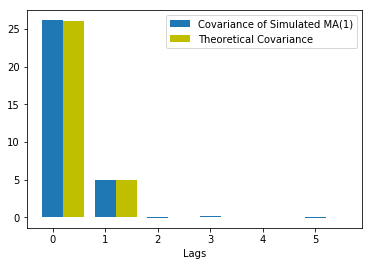

In [27]:
barWidth = 0.4

r1 = np.arange(0,ACFlags+1)
r2 = [x + barWidth for x in r1]
# Above is for aligning bars of two different variables to avoid overlapping of the image

plt.bar(r1,acf_output,width=barWidth)
plt.bar(r2,TACF[0:ACFlags+1,0],width=barWidth,color="y")

plt.xlabel("Lags")
plt.legend(['Covariance of Simulated MA(1)','Theoretical Covariance'])
plt.show()

In [28]:
example_CLT = np.zeros(int(np.floor((T-3)/3)))

In [29]:
example_CLT.shape

(332,)

In [30]:
for t in range(int(np.floor((T-3)/3))):
    example_CLT[t] =  np.cov(Xt[(1+(3*t)),:],Xt[(2+(3*t)),:],bias=True)[1,0]

In [31]:


np.std(example_CLT)



0.2692991815051003

In [32]:
np.std(Xt[0,:])

5.113459303766067

**8.Compare simulated autocovariance function vs.true**

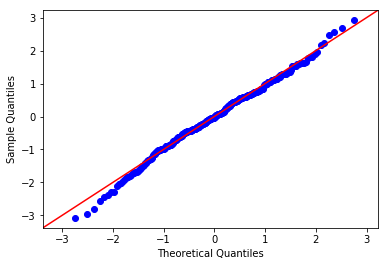

In [33]:
import statsmodels.api as sm

CLTplot = sm.qqplot((example_CLT-theta)/np.std(example_CLT),line='45')

In [34]:
sm.qqplot?

Text(0.5, 1.0, '95% confidence interval of simulated covariance')

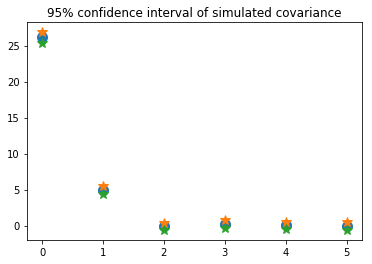

In [35]:
plt.plot(r1 , acf_output, linestyle='none', marker='o',markersize=10)

plt.plot(r1 , acf_output+1.96*acf_MCerror, linestyle='none', marker='*', markersize=10)

plt.plot(r1 , acf_output-1.96*acf_MCerror, linestyle='none', marker='*', markersize=10)

plt.title('95% confidence interval of simulated covariance')
